# **ML TERM ASSIGNMENT**

Dataset taken : [**Car Evaluation Data Set**](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

---

Date: **14.11.2021**

Roll No. and Name:  

1.   **19BCE238 HARSHIL SANGHVI**
2.   **19BCE245 AAYUSH SHAH**

Course Code and Name: **2CS501 MACHINE LEARNING**

---

## **Importing the libraries**

- Only basic libraries imported here

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Importing the dataset**

- **Dataset information:**

  - The dataset presented here is a multivariate dataset having 6 attributes. There are total 1728 instances in the dataset which can be splitted into training and testing data on user's own discretion.

  - The dataset has no missing values and the data type of attributes given in the dataset is categorical.

  - There are total 7 columns in the dataset where first six columns are of attributes namely:

    1.   Buying
    2.   Maintenance
    3.   Doors
    4.   Persons
    5.   Lug_Boot
    6.   Safety

  - Here, we are tasked to classify the acceptability of the car on the basis of above mentioned attributes. The car is tasked to be classified into four classes namely:

    1.   Unacc
    2.   Acc
    3.   Good
    4.   Vgood

- **Reading the dataset from csv file:**

  - Firstly, we read the csv file using standard function of pandas library i.e. read_csv. We read this file into dataframe named data.

  - Next we set the column names manually as the dataset does not have the column names in csv.

  - Proceeding ahead, we convert all the string values of dataset into suitable integer values as the ML classification algorithms cannot deal with the string data. This task was accomplished by mapping all the string values to integral values.

In [78]:
dataset = pd.read_csv('car.csv', names=['buying','maint','doors','persons','lug boot','safety','class'])

## **Explanatory Data Analysis**

- Available Columns : 

In [79]:
list(dataset.columns)

['buying', 'maint', 'doors', 'persons', 'lug boot', 'safety', 'class']

- Printing first 5 rows of dataset : 

In [80]:
dataset.head()

,buying,maint,doors,persons,lug boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- Getting information of dataset and checking of null values if any

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


- As all the columns are categorical, checking for unique values : 

In [82]:
for i in dataset.columns:
  print(dataset[i].unique(),"\t",dataset[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


- Checking how unique categories are distributed among the columns : 
  > All of the columns except 'class' are distributed equally among the data, as shown in the below output.

In [83]:
for i in dataset.columns:
  print(dataset[i].value_counts())
  print()

low      432
high     432
med      432
vhigh    432
Name: buying, dtype: int64

low      432
high     432
med      432
vhigh    432
Name: maint, dtype: int64

3        432
4        432
5more    432
2        432
Name: doors, dtype: int64

4       576
more    576
2       576
Name: persons, dtype: int64

med      576
small    576
big      576
Name: lug boot, dtype: int64

low     576
high    576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



### Graphs :

- The graph below shows the number of unique values in each column.
  > The graph shows that the result 'class' is unbalanced due to higher values of 'unacc'. As a result, there is a difficulty with an unbalanced multiclass classification.


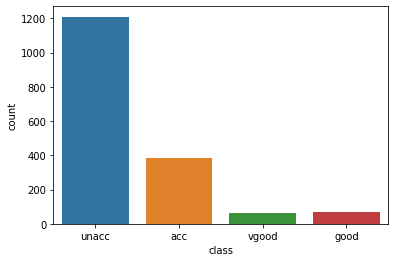

In [84]:
sns.countplot(x = dataset['class'])

- For each feature in our data, We looked at how the 'class' is distributed.

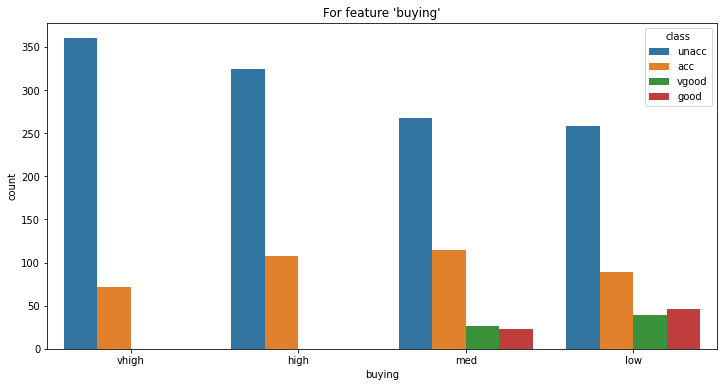

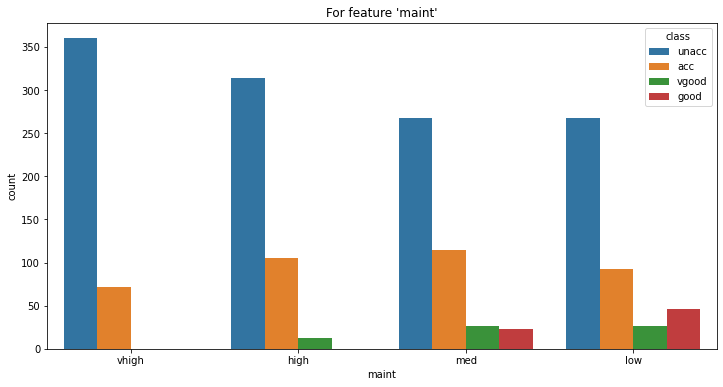

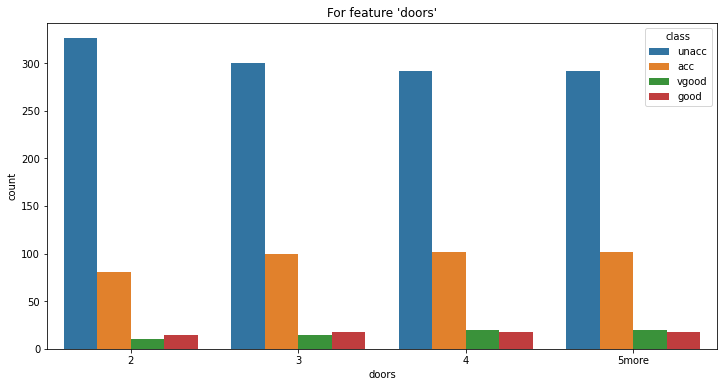

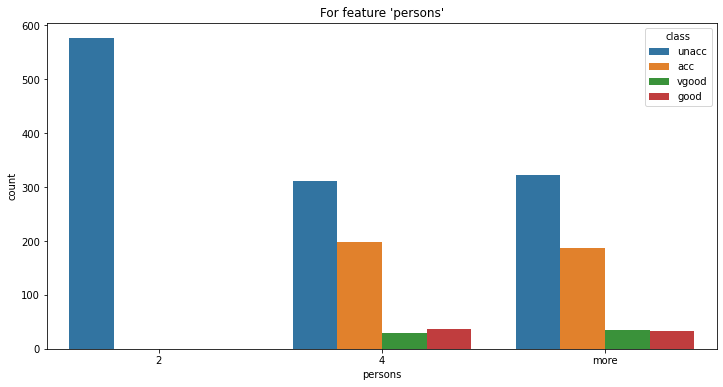

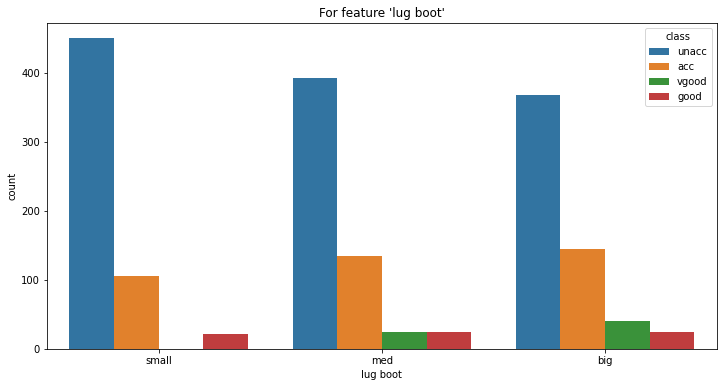

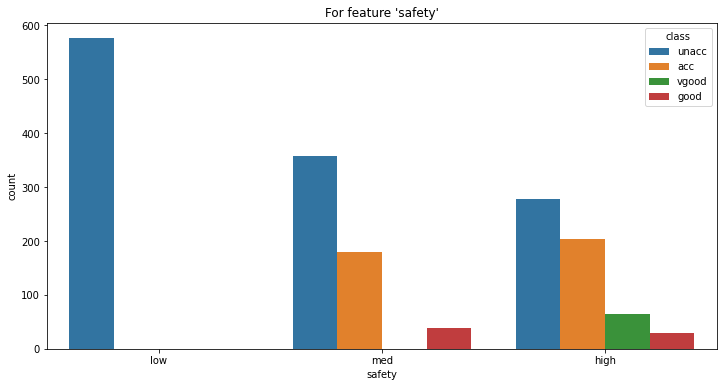

In [85]:
for i in dataset.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(x = dataset[i],hue=dataset['class'])

## **Encoding categorical data**

- We transformed string categories to integers because scikit-learn algorithms don't usually operate with string values.

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.columns = ['Buying','Maintenance','Doors','Persons','Lug_Boot','Safety','Acceptability']
dataset['Buying'] = dataset['Buying'].map({'vhigh':3,'high':2,'med':1,'low':0})
dataset['Maintenance'] = dataset['Maintenance'].map({'vhigh':3,'high':2,'med':1,'low':0})
dataset['Lug_Boot'] = dataset['Lug_Boot'].map({'big':2,'med':1,'small':0})
dataset['Safety'] = dataset['Safety'].map({'high':2,'med':1,'low':0})
dataset['Acceptability'] = dataset['Acceptability'].map({'unacc':0,'acc':1,'good':2, 'vgood':3})
dataset['Doors'] = dataset['Doors'].map({'2':2, '3':3, '4':4, '5more':5})
dataset['Persons'] = dataset['Persons'].map({'2':2, '4':4, 'more':5})

dataset

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,Acceptability
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


- Splitting dataset into independent variable `X` and dependent variable `y` : 

In [87]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

- Independent variable `X` : 

In [88]:
dataset.iloc[:,:-1]

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1
...,...,...,...,...,...,...
1723,0,0,5,5,1,1
1724,0,0,5,5,1,2
1725,0,0,5,5,2,0
1726,0,0,5,5,2,1


- Dependent variable `y` : 

In [89]:
dataset.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: Acceptability, Length: 1728, dtype: int64

## **Splitting the dataset into the training set and testing set**

- Now we split the entire dataset into training and testing data. The ratio in which we want to split is stored in the split variable and then we make use of train_test_split function to do the required splitting quickly.


In [90]:
from sklearn.model_selection import train_test_split

split = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=0)

## **Feature Scaling** *(Preprocessing the data)*

- Further we preprocess the training input data as well as testing input data by making use of StandardScaler. This helps us in standardizing features by removing the mean and scaling to unit variance.

- As multinomial bayes doesn't accept negative values, this section is for Multinomial bayes input.

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler_minMax = MinMaxScaler()
X_train_mm = scaler_minMax.fit_transform(X_train)
X_test_mm = scaler_minMax.transform(X_test)

- For other models : 

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Classification of dataset along with analysis of different models** 

### 1. **Logistic Regression**
- This section creates a logistic regression classifier. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

- Now the most important thing which is to be observed here is that as it is multi class classification, we use the one vs rest strategy. This is done by setting the value of multi_class as 'ovr' in LogisticRegression. The reason we need to this tweaks is that Logistic Regression does not natively support multi class classification and just supports binary classification.

- In order to perform multi class classification with help of such native binary classifiers, we need to make use of schemes such as one vs rest etc.

In [93]:
 from sklearn.linear_model import LogisticRegression
 clf_lr = LogisticRegression(multi_class = 'ovr', random_state=0)
 clf_lr.fit(X_train, y_train)   # fitting the training data into model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [94]:
y_pred_lr = clf_lr.predict(X_test)  # making the predictions on the basis of trained model

### 2. **K-Nearest Neighbor (K-NN)**
- This section creates a K nearest neighbors classifier and choose the best parameters for our classifier with the help of GridSearchCV. Then the fine tuned classifier i.e. clf_gs is used for the training of our data. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

In [95]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
y_pred_knn = clf_knn.predict(X_test)

- with Grid Search : 

In [97]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
                'n_neighbors' : [1, 5, 10, 25, 50, 100, 500, 900], 
                'weights' : ['uniform', 'distance']
              }
gs_knn = GridSearchCV(KNeighborsClassifier(), hyperparams, cv=5)
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 25, 50, 100, 500, 900],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- Printing The best Accuracy achieved through various combinations :

In [98]:
print(f"Best Accuracy achieved : {gs_knn.best_score_*100:.2f}%")

Best Accuracy achieved : 95.95%


- Priting the best parameters through which highest accuracy is achieved :

In [99]:
print(f"Best parameters achieved : {gs_knn.best_params_}")

Best parameters achieved : {'n_neighbors': 5, 'weights': 'distance'}


In [100]:
y_pred_knnGS = gs_knn.predict(X_test)

### 3. **Support Vector Machine (SVM)**

- This section creates a support vector classifier. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

- Now the most important thing which is to be observed here is that as it is multi class classification, we use the one vs rest strategy. This is done by setting the value of decision_function_shape as 'ovr' in SVC. The reason we need to this tweaks is that Support Vector Classifiers does not natively support multi class classification and just supports binary classification.

- In order to perform multi class classification with help of such native binary classifiers, we need to make use of schemes such as one vs rest etc.

In [101]:
from sklearn.svm import SVC

  #### a. **Linear** : 

In [102]:
clf_svc = SVC(kernel='linear', decision_function_shape='ovr', random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
y_pred_svc = clf_svc.predict(X_test)

  #### b. **Kernel SVM**


In [104]:
clf_kernelSVC = SVC(kernel='rbf', random_state=0)
clf_kernelSVC.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [105]:
y_pred_kernelSVC = clf_kernelSVC.predict(X_test)

### 4. **Naïve Bayes**


In [106]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

  #### 4.1 **Gaussian Naïve Bayes**
  - This function creates a gaussian naive bayes classifier. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

In [107]:
clf_nbGB = GaussianNB()
clf_nbGB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
y_pred_nbGB = clf_nbGB.predict(X_test)

  #### 4.2 **Bernoulli Naïve Bayes**
  - This function creates a bernoulli naive bayes classifier. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

In [109]:
clf_nbBNB = BernoulliNB()
clf_nbBNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [110]:
y_pred_nbBNB = clf_nbBNB.predict(X_test)

  #### 4.3 **Multinomial Naïve Bayes**
  - This section creates a multinomial naive bayes classifier. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

  - Here one another interesting thing to be noticed is that inputs of training and testing data are passed explicitly unlike others. The reason behind it is that multinomial naive bayes model cannot work with negative values. And as we get negative values after standard scaling, we can't pass the training and testing data stored in global variables. Instead we will treat the data with min max scaling so that it is positive and then we will pass it to multinomial naive bayes classifier.

In [111]:
clf_nbMNB = MultinomialNB()
clf_nbMNB.fit(X_train_mm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [112]:
y_pred_nbMNB = clf_nbMNB.predict(X_test)

### 5. **Decision Tree**
- This section creates a decision tree classifier and choose the best parameters for our classifier with the help of GridSearchCV. Then the fine tuned classifier i.e. clf_gs is used for the training of our data. Once the model is fit into training data, then it is used for testing purposes i.e. predictions are made on the input of testing data and analysis of the result is carried out.

- In decision tree, taking a step further, decision trees itself are visualised to get a clear picture of the classification.


In [113]:
from sklearn.tree import DecisionTreeClassifier

- with Gini :

In [114]:
clf_dtGINI = DecisionTreeClassifier(criterion='gini',  random_state=0)
clf_dtGINI.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [115]:
y_pred_dtGINI = clf_dtGINI.predict(X_test)

- with Entropy : 

In [116]:
clf_dtENTROPY = DecisionTreeClassifier(criterion='entropy',  random_state=0)
clf_dtENTROPY.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [117]:
y_pred_dtENTROPY = clf_dtENTROPY.predict(X_test)

- with Grid Search : 

In [118]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
                'max_depth' : np.linspace(5, 100,num=20).tolist(),    # before : [1, 5, 10, 25, 50, 100]; after : [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0];
                'criterion': ['gini', 'entropy'],
              }
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=hyperparams,
                           scoring='accuracy',  
                           cv=10,
                           )
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

- Printing The best Accuracy achieved through various combinations :

In [119]:
print(f"Best Accuracy achieved : {gs_dt.best_score_*100:.2f}%")

Best Accuracy achieved : 98.41%


- Priting the best parameters through which highest accuracy is achieved :

In [120]:
print(f"Best parameters achieved : {gs_dt.best_params_}")
criteria, depth = gs_dt.best_params_['criterion'], gs_dt.best_params_['max_depth']

Best parameters achieved : {'criterion': 'entropy', 'max_depth': 50.0}


In [121]:
clf_dt = DecisionTreeClassifier(criterion=criteria, max_depth=depth)
clf_dt.fit(X_train, y_train)
y_pred_dtGS = clf_dt.predict(X_test)

- Visualisation : 
  - This section helps in visualising the decision tree by taking the respective classifier as input.

[Text(845.848880597015, 1041.9, 'Safety <= -0.602\nentropy = 1.203\nsamples = 1382\nvalue = [970, 305, 52, 55]\nclass = Unacc'),
 Text(825.0279850746268, 951.3000000000001, 'entropy = 0.0\nsamples = 470\nvalue = [470, 0, 0, 0]\nclass = Unacc'),
 Text(866.669776119403, 951.3000000000001, 'Persons <= -0.529\nentropy = 1.484\nsamples = 912\nvalue = [500, 305, 52, 55]\nclass = Unacc'),
 Text(845.848880597015, 860.7, 'entropy = 0.0\nsamples = 308\nvalue = [308, 0, 0, 0]\nclass = Unacc'),
 Text(887.4906716417911, 860.7, 'Buying <= -0.005\nentropy = 1.643\nsamples = 604\nvalue = [192, 305, 52, 55]\nclass = Acc'),
 Text(567.3694029850747, 770.1, 'Maintenance <= 0.023\nentropy = 1.737\nsamples = 297\nvalue = [34, 156, 52, 55]\nclass = Acc'),
 Text(281.0820895522388, 679.5, 'Safety <= 0.615\nentropy = 1.796\nsamples = 153\nvalue = [8, 48, 52, 45]\nclass = Good'),
 Text(114.51492537313433, 588.9, 'Lug_Boot <= -0.612\nentropy = 1.235\nsamples = 74\nvalue = [4, 40, 30, 0]\nclass = Acc'),
 Text(62.4

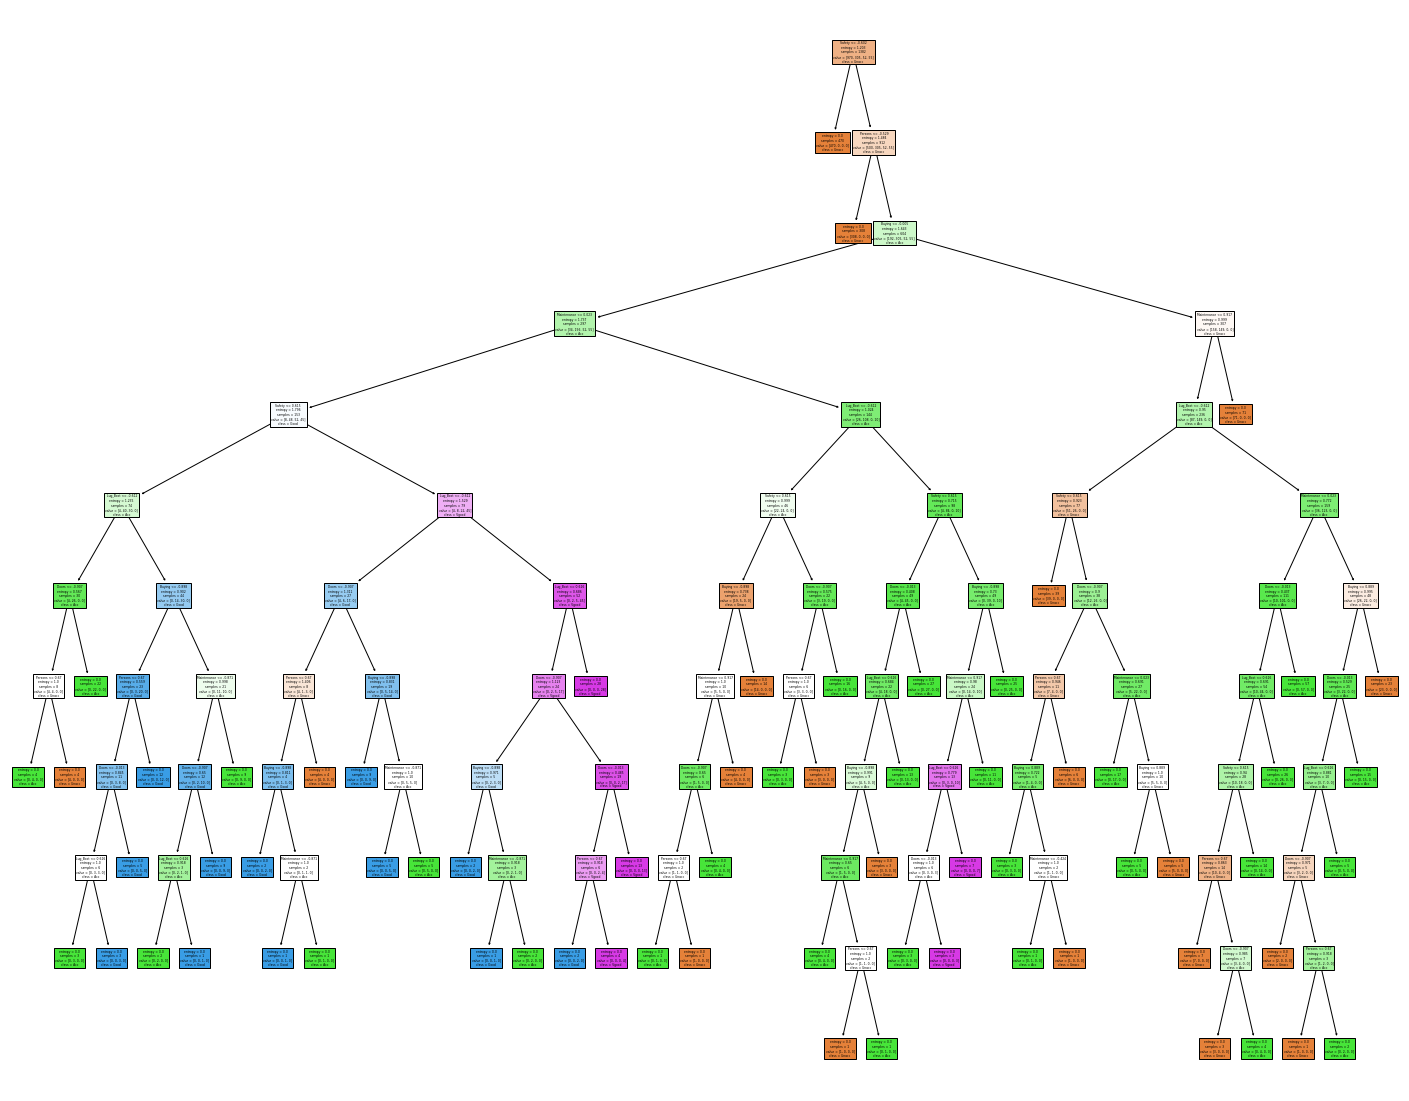

In [122]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_dt, feature_names=list(dataset.iloc[:,:-1].columns), class_names=['Unacc','Acc','Good','Vgood'], filled=True)

### 6. **Random Forest Classifier**


In [123]:
from sklearn.ensemble import RandomForestClassifier

- with Gini

In [124]:
clf_rfcGINI = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0, n_jobs=-1)
clf_rfcGINI.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [125]:
y_pred_rfcGINI = clf_rfcGINI.predict(X_test)

- with Entropy

In [126]:
clf_rfcENTROPY = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, n_jobs=-1)
clf_rfcENTROPY.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
y_pred_rfcENTROPY = clf_rfcENTROPY.predict(X_test)

- with Grid Search : 

In [128]:
from sklearn.model_selection import GridSearchCV, learning_curve

hyperparams = {
                'max_depth' : np.linspace(10, 100,num=10).tolist(),    # [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
                'criterion': ['gini', 'entropy'],
              }
gs_rfc = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=hyperparams,
                           scoring='accuracy',  
                           cv=10,
                           )
gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

- Printing The best Accuracy achieved through various combinations :

In [129]:
print(f"Best Accuracy achieved : {gs_rfc.best_score_*100:.2f}%")

Best Accuracy achieved : 98.34%


- Priting the best parameters through which highest accuracy is achieved :

In [130]:
print(f"Best parameters achieved : {gs_rfc.best_params_}")

Best parameters achieved : {'criterion': 'gini', 'max_depth': 80.0}


In [131]:
y_pred_rfcGS = gs_rfc.predict(X_test)

### 7. **Multi Layer Perceptron**


- This section creates a Multi-layer Perceptron. Once the model is fit into training data, then score of the classifier is calculated. Score returns the mean accuracy on the given test data and labels.

- In MLP, default values of various important parameters are as below:


1.   Hidden Layer Size - (100,)
2.   Activation function - relu
3.   Initial Learning rate - 0.001
4.   Learning rate - constant
5.   Alpha (L2 regularisation parameter) - 0.0001
6.   Maximum number of iterations - 200

- We can change these hyperparameters manually for obtaining the best score. But that would be troublesome. Instead we can make use of GridSearchCV here as well. We even tried to add it in our program, but it couldn't complete it's execution (possibly due to expensive computation it would require for testing all permutations and combinations with different possible hyperparamters). Hence due to this reason and also due to already getting very high score, we chose to remove the GridSearchCV from the implementation of MLP.



In [132]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(max_iter=10000)
clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)
mlp_accuracy = clf_mlp.score(X_test,y_test)

In [133]:
print(f'Accuracy achieved: {mlp_accuracy*100:.2f}%')

Accuracy achieved: 99.71%


### **Extra models** : 


  - #### **Extreme Gradient Boosting** *(XGBoost)*

In [134]:
pip install -U xgboost

- Training XGBoost model on training set

In [135]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(use_label_encoder =False, eval_metric = 'mlogloss')
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

- Confusion matrix and Accuracy Score : 

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_xgb = clf_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
accuracy_score(y_test, y_pred_xgb)

[[239   1   0   0]
 [  0  76   3   0]
 [  0   0  17   0]
 [  0   1   0   9]]


0.9855491329479769

- K-Fold Cross Validation :

In [137]:
from sklearn.model_selection import cross_val_score
accuracies_xgb = cross_val_score(estimator = clf_xgb, X = X_train, y = y_train, cv = 10)
print(f"Accuracy: {accuracies_xgb.mean()*100:.2f} %")
print(f"Standard Deviation: {accuracies_xgb.std()*100:.2f} %")

Accuracy: 98.99 %
Standard Deviation: 0.93 %


  - #### **CatBoost**

In [138]:
pip install -U catboost

- Training CatBoost model on training set

In [139]:
from catboost import CatBoostClassifier   
clf_cb = CatBoostClassifier()
clf_cb.fit(dataset.iloc[:,:-1].values, dataset.iloc[:,-1].values)

Learning rate set to 0.081365
0:	learn: 1.2424803	total: 1.37ms	remaining: 1.37s
1:	learn: 1.1428147	total: 2.69ms	remaining: 1.34s
2:	learn: 1.0433181	total: 3.82ms	remaining: 1.27s
3:	learn: 0.9678411	total: 5.09ms	remaining: 1.27s
4:	learn: 0.8882661	total: 6.36ms	remaining: 1.26s
5:	learn: 0.8250270	total: 7.64ms	remaining: 1.26s
6:	learn: 0.7754668	total: 8.88ms	remaining: 1.26s
7:	learn: 0.7327375	total: 9.81ms	remaining: 1.22s
8:	learn: 0.6832526	total: 11.1ms	remaining: 1.22s
9:	learn: 0.6501498	total: 12.3ms	remaining: 1.22s
10:	learn: 0.6113986	total: 13.6ms	remaining: 1.22s
11:	learn: 0.5774126	total: 14.8ms	remaining: 1.22s
12:	learn: 0.5483033	total: 16.1ms	remaining: 1.22s
13:	learn: 0.5182601	total: 17.3ms	remaining: 1.22s
14:	learn: 0.4932282	total: 18.6ms	remaining: 1.22s
15:	learn: 0.4684922	total: 19.8ms	remaining: 1.22s
16:	learn: 0.4479845	total: 21ms	remaining: 1.22s
17:	learn: 0.4298701	total: 22.3ms	remaining: 1.21s
18:	learn: 0.4106868	total: 23.5ms	remaining: 

- Confusion matrix and Accuracy Score :

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_cb = clf_cb.predict(X_test)
cm_cb = confusion_matrix(y_test, y_pred_cb)
print(cm_cb)
accuracy_score(y_test, y_pred_cb)

[[240   0   0   0]
 [ 79   0   0   0]
 [ 17   0   0   0]
 [ 10   0   0   0]]


0.6936416184971098

- K-Fold Cross Validation :

In [141]:
from sklearn.model_selection import cross_val_score
accuracies_cb = cross_val_score(estimator = clf_cb, X = X_train, y = y_train, cv = 10)
print(f"Accuracy: {accuracies_cb.mean()*100:.2f} %")
print(f"Standard Deviation: {accuracies_cb.std()*100:.2f} %")

Streaming output truncated to the last 5000 lines.
6:	learn: 0.8101642	total: 7.79ms	remaining: 1.1s
7:	learn: 0.7643373	total: 8.59ms	remaining: 1.06s
8:	learn: 0.7129046	total: 9.65ms	remaining: 1.06s
9:	learn: 0.6789517	total: 10.7ms	remaining: 1.06s
10:	learn: 0.6370075	total: 11.9ms	remaining: 1.07s
11:	learn: 0.6040444	total: 13ms	remaining: 1.07s
12:	learn: 0.5738393	total: 14.2ms	remaining: 1.08s
13:	learn: 0.5476943	total: 15.2ms	remaining: 1.07s
14:	learn: 0.5188107	total: 16.3ms	remaining: 1.07s
15:	learn: 0.4947099	total: 17.7ms	remaining: 1.09s
16:	learn: 0.4733621	total: 19.5ms	remaining: 1.13s
17:	learn: 0.4520790	total: 21.4ms	remaining: 1.17s
18:	learn: 0.4315793	total: 23.1ms	remaining: 1.19s
19:	learn: 0.4125734	total: 24.7ms	remaining: 1.21s
20:	learn: 0.3957448	total: 25.8ms	remaining: 1.2s
21:	learn: 0.3835707	total: 26.8ms	remaining: 1.19s
22:	learn: 0.3685739	total: 27.9ms	remaining: 1.18s
23:	learn: 0.3577568	total: 29ms	remaining: 1.18s
24:	learn: 0.3461874	to

## **Learning curves**

Here, we are explore learning curves. learning_curve is an inbuilt function in package sklearn.model_selection. It helps us to determine cross-validated training and test scores for different training set sizes. When we plot it, we get a visualisation of this and our purpose gets clear.

Here we have plotted learning curves for three classification models:


1.   Decision Trees
2.   Random Forest Classifier
3.   Multi Layer Perceptron



In [142]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

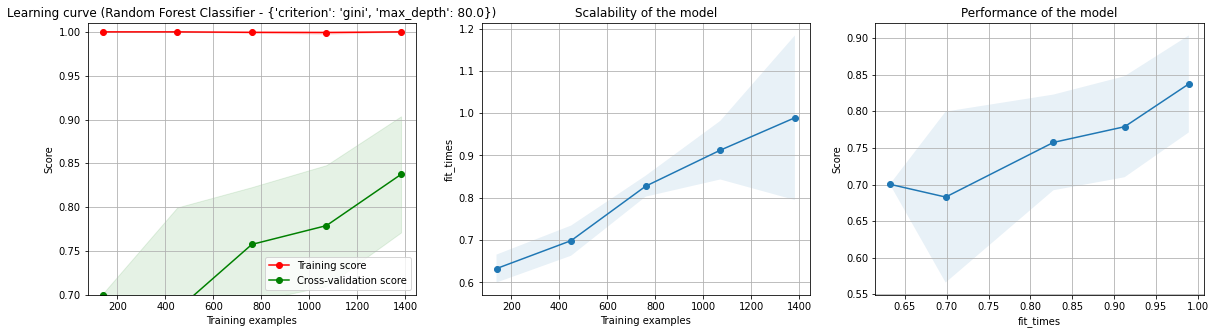

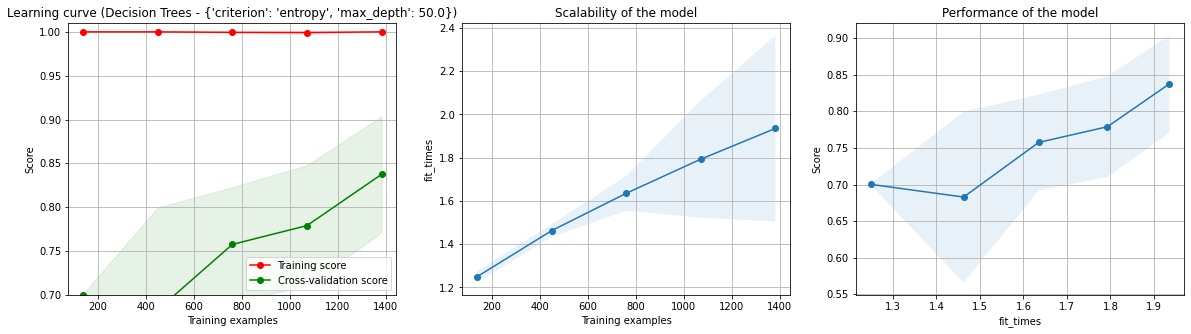

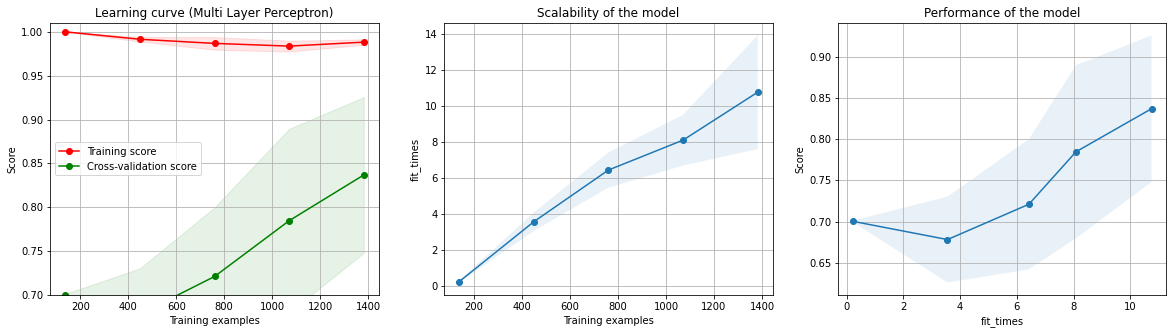

In [143]:
title = f'Learning curve (Random Forest Classifier - {gs_rfc.best_params_})'
plot_learning_curve(gs_rfc, title, X, y, ylim=(0.7, 1.01), n_jobs=4)

title = f'Learning curve (Decision Trees - {gs_dt.best_params_})'
plot_learning_curve(gs_dt, title, X, y, ylim=(0.7, 1.01), n_jobs=4)

title = f'Learning curve (Multi Layer Perceptron)'
plot_learning_curve(clf_mlp, title, X, y, ylim=(0.7, 1.01), n_jobs=4)

## **Evaluating the model performance**

- This is a very important function as it will take the predictions and output of testing data from various models and present respective results' analysis in the form of:
  - Classification report
  - Confusion matrix
  - Accuracy score
  - K-Fold Cross Validation

In [144]:
pip install -U prettytable

In [145]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

- ### **Classification Reports :**

In [146]:
predictions = [y_pred_lr, y_pred_knn, y_pred_knnGS, y_pred_svc, y_pred_kernelSVC, y_pred_nbGB, y_pred_nbBNB, y_pred_nbMNB, y_pred_dtGINI, y_pred_dtENTROPY, y_pred_dtGS, y_pred_rfcGINI, y_pred_rfcENTROPY, y_pred_rfcGS, y_pred_mlp]
models = [
          'Logistic Regression',
          'K Nearest Neighbor',
          'K Nearest Neighbor (with Grid Search)',
          'Support Vector Machine (with Linear)',
          'Support Vector Machine (with Kernel)',
          'Naïve Bayes (with Gaussian)',
          'Naïve Bayes (with Bernoulli)',
          'Naïve Bayes (with Multinomial)',
          'Decision Tree (with GINI)',
          'Decision Tree (with Entropy)',
          'Decision Tree (with GridSearch)',
          'Random Forest (with GINI)',
          'Random Forest (with ENTROPY)',
          'Random Forest (with GridSearch)',
          'Multi Layer Perceptron'
         ]
for i in range(len(predictions)):
  print(f'\n---------------------- Classification Report of: {models[i]} ----------------------\n')
  print(classification_report(y_test,predictions[i]))


---------------------- Classification Report of: Logistic Regression ----------------------

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       240
           1       0.58      0.57      0.58        79
           2       0.67      0.12      0.20        17
           3       0.75      0.30      0.43        10

    accuracy                           0.80       346
   macro avg       0.72      0.48      0.53       346
weighted avg       0.79      0.80      0.78       346


---------------------- Classification Report of: K Nearest Neighbor ----------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       240
           1       0.94      0.95      0.94        79
           2       1.00      0.88      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.98      0.93      0.95       34

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- ### **Confusion Matrix :**

In [147]:
confusionMatrixTable = PrettyTable()
confusionMatrixTable.field_names = ["Model", "Confusion Matrix"]
confusionMatrixTable.add_row(["Logistic Regression", confusion_matrix(y_test, y_pred_lr)])
confusionMatrixTable.add_row(["------------------------------", "------------------"])
confusionMatrixTable.add_row(["K Nearest Neighbor", confusion_matrix(y_test, y_pred_knn)])
confusionMatrixTable.add_row(["K Nearest Neighbor (with Grid Search)", confusion_matrix(y_test, y_pred_knnGS)])
confusionMatrixTable.add_row(["------------------------------", "------------------"])
confusionMatrixTable.add_row(["Support Vector Machine (with Linear)", confusion_matrix(y_test, y_pred_svc)])
confusionMatrixTable.add_row(["Support Vector Machine (with Kernel)", confusion_matrix(y_test, y_pred_kernelSVC)])
confusionMatrixTable.add_row(["------------------------------", "------------------"])
confusionMatrixTable.add_row(["Naïve Bayes (with Gaussian)", confusion_matrix(y_test, y_pred_nbGB)])
confusionMatrixTable.add_row(["Naïve Bayes (with Bernoulli)", confusion_matrix(y_test, y_pred_nbBNB)])
confusionMatrixTable.add_row(["Naïve Bayes (with Multinomial)", confusion_matrix(y_test, y_pred_nbMNB)])
confusionMatrixTable.add_row(["------------------------------", "------------------"])
confusionMatrixTable.add_row(["Decision Tree (with GINI)", confusion_matrix(y_test, y_pred_dtGINI)])
confusionMatrixTable.add_row(["Decision Tree (with Entropy)", confusion_matrix(y_test, y_pred_dtENTROPY)])
confusionMatrixTable.add_row(["Decision Tree (with GridSearch)", confusion_matrix(y_test, y_pred_dtGS)])
confusionMatrixTable.add_row(["------------------------------", "------------------"])
confusionMatrixTable.add_row(["Random Forest (with GINI)", confusion_matrix(y_test, y_pred_rfcGINI)])
confusionMatrixTable.add_row(["Random Forest (with ENTROPY)", confusion_matrix(y_test, y_pred_rfcENTROPY)])
confusionMatrixTable.add_row(["Random Forest (with GridSearch)", confusion_matrix(y_test, y_pred_rfcGS)])
confusionMatrixTable.add_row(["------------------------------", "------------------"])
confusionMatrixTable.add_row(["Multi Layer Perceptron", confusion_matrix(y_test, y_pred_mlp)])

print(confusionMatrixTable)

+---------------------------------------+---------------------+
|                 Model                 |   Confusion Matrix  |
+---------------------------------------+---------------------+
|          Logistic Regression          |  [[228  12   0   0] |
|                                       |   [ 33  45   1   0] |
|                                       |   [  1  13   2   1] |
|                                       |  [  0   7   0   3]] |
|     ------------------------------    |  ------------------ |
|           K Nearest Neighbor          |  [[238   2   0   0] |
|                                       |   [  4  75   0   0] |
|                                       |   [  0   2  15   0] |
|                                       |  [  0   1   0   9]] |
| K Nearest Neighbor (with Grid Search) |  [[238   2   0   0] |
|                                       |   [  4  73   1   1] |
|                                       |   [  0   1  16   0] |
|                                       

- ### **K-Fold Cross Validation :**


In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
accuracies_lr = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=clf_knn, X=X_train, y=y_train, cv=10)
accuracies_knnGS = cross_val_score(estimator=gs_knn, X=X_train, y=y_train, cv=10)
accuracies_svc = cross_val_score(estimator=clf_svc, X=X_train, y=y_train, cv=10)
accuracies_kernelSVC = cross_val_score(estimator=clf_kernelSVC, X=X_train, y=y_train, cv=10)
accuracies_nbGB = cross_val_score(estimator=clf_nbGB, X=X_train, y=y_train, cv=10)
accuracies_nbBNB = cross_val_score(estimator=clf_nbBNB, X=X_train, y=y_train, cv=10)
accuracies_nbMNB = cross_val_score(estimator=clf_nbMNB, X=X_train_mm, y=y_train, cv=10)
accuracies_dtGINI = cross_val_score(estimator=clf_dtGINI, X=X_train, y=y_train, cv=10)
accuracies_dtENTROPY = cross_val_score(estimator=clf_dtENTROPY, X=X_train, y=y_train, cv=10)
accuracies_dt = cross_val_score(estimator=clf_dt, X=X_train, y=y_train, cv=10)
accuracies_rfcGINI = cross_val_score(estimator=clf_rfcGINI, X=X_train, y=y_train, cv=10)
accuracies_rfcENTROPY = cross_val_score(estimator=clf_rfcENTROPY, X=X_train, y=y_train, cv=10)
accuracies_rfcGS = cross_val_score(estimator=gs_rfc, X=X_train, y=y_train, cv=10)
accuracies_mlp = cross_val_score(estimator=clf_mlp, X=X_train, y=y_train, cv=10)

In [150]:
crossValidationTable = PrettyTable()
crossValidationTable.field_names = ["Model", "Mean of Accuracy", "Standard Deviation of Accuracy"]
crossValidationTable.add_row(["Logistic Regression", f"{accuracies_lr.mean()*100:.2f}%",f"{accuracies_lr.std()*100:.2f}%"])
crossValidationTable.add_row(["------------------------------", "------------------", "------------------"])
crossValidationTable.add_row(["K Nearest Neighbor", f"{accuracies_knn.mean()*100:.2f}%",f"{accuracies_knn.std()*100:.2f}%"])
crossValidationTable.add_row(["K Nearest Neighbor (with Grid Search)", f"{accuracies_knnGS.mean()*100:.2f}%",f"{accuracies_knnGS.std()*100:.2f}%"])
crossValidationTable.add_row(["------------------------------", "------------------", "------------------"])
crossValidationTable.add_row(["Support Vector Machine (with Linear)", f"{accuracies_svc.mean()*100:.2f}%",f"{accuracies_svc.std()*100:.2f}%" ])
crossValidationTable.add_row(["Support Vector Machine (with Kernel)", f"{accuracies_kernelSVC.mean()*100:.2f}%",f"{accuracies_kernelSVC.std()*100:.2f}%" ])
crossValidationTable.add_row(["------------------------------", "------------------", "------------------"])
crossValidationTable.add_row(["Naïve Bayes (with Gaussian)", f"{accuracies_nbGB.mean()*100:.2f}%",f"{accuracies_nbGB.std()*100:.2f}%" ])
crossValidationTable.add_row(["Naïve Bayes (with Bernoulli)", f"{accuracies_nbBNB.mean()*100:.2f}%",f"{accuracies_nbBNB.std()*100:.2f}%" ])
crossValidationTable.add_row(["Naïve Bayes (with Multinomial)", f"{accuracies_nbMNB.mean()*100:.2f}%",f"{accuracies_nbMNB.std()*100:.2f}%" ])
crossValidationTable.add_row(["------------------------------", "------------------", "------------------"])
crossValidationTable.add_row(["Decision Tree (with GINI)", f"{accuracies_dtGINI.mean()*100:.2f}%",f"{accuracies_dtGINI.std()*100:.2f}%" ])
crossValidationTable.add_row(["Decision Tree (with Entropy)", f"{accuracies_dtENTROPY.mean()*100:.2f}%",f"{accuracies_dtENTROPY.std()*100:.2f}%" ])
crossValidationTable.add_row(["Decision Tree (with GridSearch)", f"{accuracies_dt.mean()*100:.2f}%",f"{accuracies_dt.std()*100:.2f}%" ])
crossValidationTable.add_row(["------------------------------", "------------------", "------------------"])
crossValidationTable.add_row(["Random Forest (with GINI)", f"{accuracies_rfcGINI.mean()*100:.2f}%",f"{accuracies_rfcGINI.std()*100:.2f}%" ])
crossValidationTable.add_row(["Random Forest (with ENTROPY)", f"{accuracies_rfcENTROPY.mean()*100:.2f}%",f"{accuracies_rfcENTROPY.std()*100:.2f}%" ])
crossValidationTable.add_row(["Random Forest (with GridSearch)", f"{accuracies_rfcGS.mean()*100:.2f}%",f"{accuracies_rfcGS.std()*100:.2f}%" ])
crossValidationTable.add_row(["------------------------------", "------------------", "------------------"])
crossValidationTable.add_row(["Multi Layer Perceptron", f"{accuracies_mlp.mean()*100:.2f}%",f"{accuracies_mlp.std()*100:.2f}%" ])
print(crossValidationTable)

+---------------------------------------+--------------------+--------------------------------+
|                 Model                 |  Mean of Accuracy  | Standard Deviation of Accuracy |
+---------------------------------------+--------------------+--------------------------------+
|          Logistic Regression          |       82.70%       |             2.67%              |
|     ------------------------------    | ------------------ |       ------------------       |
|           K Nearest Neighbor          |       96.46%       |             2.21%              |
| K Nearest Neighbor (with Grid Search) |       96.38%       |             1.80%              |
|     ------------------------------    | ------------------ |       ------------------       |
|  Support Vector Machine (with Linear) |       86.83%       |             1.98%              |
|  Support Vector Machine (with Kernel) |       96.74%       |             1.87%              |
|     ------------------------------    

- ### **Accuracy Table :**

In [151]:
accuracies = [
              accuracy_score(y_test, y_pred_lr).round(4)*100,
              accuracy_score(y_test, y_pred_knn).round(2)*100,
              accuracy_score(y_test, y_pred_knnGS).round(4)*100,
              accuracy_score(y_test, y_pred_svc).round(4)*100,
              accuracy_score(y_test, y_pred_kernelSVC).round(4)*100,
              accuracy_score(y_test, y_pred_nbGB).round(4)*100,
              accuracy_score(y_test, y_pred_nbBNB).round(3)*100,
              accuracy_score(y_test, y_pred_nbMNB).round(4)*100,
              accuracy_score(y_test, y_pred_dtGINI).round(4)*100,
              accuracy_score(y_test, y_pred_dtENTROPY).round(4)*100,
              accuracy_score(y_test, y_pred_dtGS).round(4)*100,
              accuracy_score(y_test, y_pred_rfcGINI).round(4)*100,
              accuracy_score(y_test, y_pred_rfcENTROPY).round(3)*100,
              accuracy_score(y_test, y_pred_rfcGS).round(2)*100,
              accuracy_score(y_test, y_pred_mlp).round(3)*100
]

accuracyScoreTable = PrettyTable()
accuracyScoreTable.field_names = ["Model", "Accuracy Score (in %)"]
accuracyScoreTable.add_row(["Logistic Regression", accuracies[0]])
accuracyScoreTable.add_row(["------------------------------", "------------------"])
accuracyScoreTable.add_row(["K Nearest Neighbor", accuracies[1]])
accuracyScoreTable.add_row(["K Nearest Neighbor (with Grid Search)", accuracies[2]])
accuracyScoreTable.add_row(["------------------------------", "------------------"])
accuracyScoreTable.add_row(["Support Vector Machine (with Linear)", accuracies[3]])
accuracyScoreTable.add_row(["Support Vector Machine (with Kernel)", accuracies[4]])
accuracyScoreTable.add_row(["------------------------------", "------------------"])
accuracyScoreTable.add_row(["Naïve Bayes (with Gaussian)", accuracies[5]])
accuracyScoreTable.add_row(["Naïve Bayes (with Bernoulli)", accuracies[6]])
accuracyScoreTable.add_row(["Naïve Bayes (with Multinomial)", accuracies[7]])
accuracyScoreTable.add_row(["------------------------------", "------------------"])
accuracyScoreTable.add_row(["Decision Tree (with GINI)", accuracies[8]])
accuracyScoreTable.add_row(["Decision Tree (with Entropy)", accuracies[9]])
accuracyScoreTable.add_row(["Decision Tree (with GridSearch)", accuracies[10]])
accuracyScoreTable.add_row(["------------------------------", "------------------"])
accuracyScoreTable.add_row(["Random Forest (with GINI)", accuracies[11]])
accuracyScoreTable.add_row(["Random Forest (with ENTROPY)", accuracies[12]])
accuracyScoreTable.add_row(["Random Forest (with GridSearch)", accuracies[13]])
accuracyScoreTable.add_row(["------------------------------", "------------------"])
accuracyScoreTable.add_row(["Multi Layer Perceptron", accuracies[14]])

print(accuracyScoreTable)

+---------------------------------------+-----------------------+
|                 Model                 | Accuracy Score (in %) |
+---------------------------------------+-----------------------+
|          Logistic Regression          |         80.35         |
|     ------------------------------    |   ------------------  |
|           K Nearest Neighbor          |          97.0         |
| K Nearest Neighbor (with Grid Search) |         97.11         |
|     ------------------------------    |   ------------------  |
|  Support Vector Machine (with Linear) |         86.13         |
|  Support Vector Machine (with Kernel) |         95.95         |
|     ------------------------------    |   ------------------  |
|      Naïve Bayes (with Gaussian)      |         72.54         |
|      Naïve Bayes (with Bernoulli)     |          79.5         |
|     Naïve Bayes (with Multinomial)    |         71.97         |
|     ------------------------------    |   ------------------  |
|       De

- Visualisation :

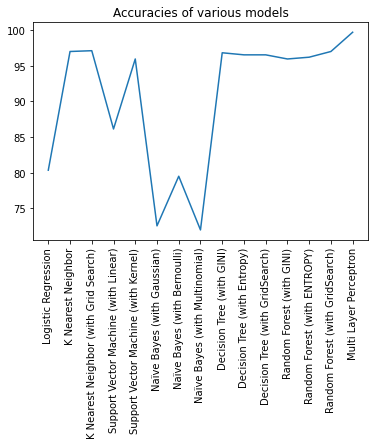

In [152]:
plt.plot(models, accuracies)
plt.xticks(rotation='vertical')
plt.title('Accuracies of various models')
plt.show()

## **Conclusion :**

- In this assignment, we performed classification on Car evaluation dataset using various classification models such as:

  1.   Gaussian Naïve Bayes
  2.   Bernoulli Naïve Bayes
  3.   Multinomial Naïve Bayes
  4.   Logistic Regression with One vs Rest
  5.   Support Vector Machine (SVM)
  6.   K Nearest Neighbour (KNN)
  7.   Decision Tree
  8.   Random Forest Classifier
  9.   Multi Layer Perceptron

- Out of the results obtained from various models, we reach to a conclusion that MLP, KNN, Random forests and Decision Trees provide the most accurate results. Now lets begin our analysis by comparing Decision trees with KNN.

- The accuracies obtained by these models are almost near to each other(~97%). Though both are non parametric methods, Decision Tree is faster as compared to KNN. The reason behind this can be attributed to the expensive real time execution taking place in KNN. Apart from this, Decision Trees also supports automatic feature interaction, a feature which KNN lacks.

- Important thing to be noted here is that Random Forest classifier also gives amazing accuracy which is almost comparable to decision trees. In general scenario, Random forest tends to give higher accuracy compared to Decision Trees. So now let's have a comparison between Decision Tree and Random Forest classifier to decide the best classifier for our dataset in overall manner. 

- A decision tree is a collection of choices, whereas a random forest is a collection of decision trees. As a result, it is a lengthy yet sluggish procedure.

- A decision tree, on the other hand, is quick and easy to use on huge data sets, especially linear data sets. The random forest model needs extensive training.

- It is dependent on our needs. If we have only have a limited amount of time to work on a model, we'll almost certainly go for a decision tree. Random forests, on the other hand, are known for their predictability and stability.

- Now at last, let's compare Multi Layer Perceptron, rather known as Artificial Neural Network with other classifiers. The main advantages that this model provides over other classifiers :

  1.   ANNs have the ability to learn and model non-linear and complex relationships
  2.   ANNs can generalize — After learning from the initial inputs and their relationships, it can infer unseen relationships on unseen data as well, thus making the model generalize and predict on unseen data.
  3.   Unlike many other prediction techniques, ANN does not impose any restrictions on the input variables (like how they should be distributed).



- Looking to our dataset and requirements, we conclude that MLP would be the most suitable model for the classification on our Car evaluation dataset to obtain highest accuracy. But if we want a balance between training time and accuracy, then Decision Trees with Gini Criterion would be the choice!
